In [ ]:
!pip install transformers nltk matplotlib vaderSentiment wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import nltk
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer, util
from transformers import MarianMTModel, MarianTokenizer, pipeline
import json

# Download NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Text to be processed
text = '''
Cogneto is a note-taking app that leverages AI to enhance user experience through real-time features like sentiment-based categorization, tag suggestions, summarization, and similarity search. These features are designed to help users manage and organize their notes in a more intelligent way, creating a seamless and efficient note-taking process.

To achieve these functionalities, you can make use of a variety of models from Hugging Face. For sentiment-based categorization, you can use a model like **distilbert-base-uncased-finetuned-sst-2-english**, which helps to classify notes into different sentiment categories such as positive, negative, or neutral. This can be useful for sorting notes into different priorities or categories within the app.

For generating automatic tag suggestions based on the content of a note, the **ml6team/keyphrase-extraction-kbir-inspec** model is a great fit. It extracts key phrases or keywords from the note and can provide relevant tag suggestions, helping users organize their notes more efficiently.

If users want to get summaries of long notes, the **facebook/bart-large-cnn** model is ideal for summarization. It condenses longer text into shorter summaries, giving users a quick overview without having to read everything. Alternatively, the distilled version **sshleifer/distilbart-cnn-12-6** can be used for faster processing with a slightly reduced model size.

To facilitate finding related notes and creating intelligent connections between them, the **sentence-transformers/all-MiniLM-L6-v2** model can be employed. It generates embeddings for each note, allowing the app to identify and suggest similar notes, which could be helpful for users who want to easily find related content or revisit past notes that are contextually relevant.

These models are all freely available on Hugging Face with generous usage limits, which makes them well-suited for integration into a real-time, scalable application like Cogneto. Their performance is fast enough for real-time applications, so users can get immediate feedback while interacting with the app. Additionally, Hugging Face provides an easy-to-use API for integrating these models into your app, and there’s no need for complex setup or heavy infrastructure changes.

To use these models, you’ll need to sign up for a Hugging Face account and generate an API key. Once you have the key, you can use it to access the models through the Hugging Face inference API, which allows you to make requests to the models for text analysis, summarization, and other tasks. The free tier includes 30,000 requests per month per model, which is usually more than enough for development and production use.

Integrating these Hugging Face models into Cogneto will not only provide powerful AI features but also ensure that the app remains fast, user-friendly, and scalable, allowing you to focus on creating the best possible experience for your users.
'''

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['\nCogneto is a note-taking app that leverages AI to enhance user experience through real-time features like sentiment-based categorization, tag suggestions, summarization, and similarity search.', 'These features are designed to help users manage and organize their notes in a more intelligent way, creating a seamless and efficient note-taking process.', 'To achieve these functionalities, you can make use of a variety of models from Hugging Face.', 'For sentiment-based categorization, you can use a model like **distilbert-base-uncased-finetuned-sst-2-english**, which helps to classify notes into different sentiment categories such as positive, negative, or neutral.', 'This can be useful for sorting notes into different priorities or categories within the app.', 'For generating automatic tag suggestions based on the content of a note, the **ml6team/keyphrase-extraction-kbir-inspec** model is a great fit.', 'It extracts key phrases or keywords from the note and can provide relevant tag 

In [ ]:
# Split text into words
words = word_tokenize(text)
print(words)

# Create frequency distribution of raw words
fdist = FreqDist(words)
fdist.most_common(10)
print(fdist)

['Cogneto', 'is', 'a', 'note-taking', 'app', 'that', 'leverages', 'AI', 'to', 'enhance', 'user', 'experience', 'through', 'real-time', 'features', 'like', 'sentiment-based', 'categorization', ',', 'tag', 'suggestions', ',', 'summarization', ',', 'and', 'similarity', 'search', '.', 'These', 'features', 'are', 'designed', 'to', 'help', 'users', 'manage', 'and', 'organize', 'their', 'notes', 'in', 'a', 'more', 'intelligent', 'way', ',', 'creating', 'a', 'seamless', 'and', 'efficient', 'note-taking', 'process', '.', 'To', 'achieve', 'these', 'functionalities', ',', 'you', 'can', 'make', 'use', 'of', 'a', 'variety', 'of', 'models', 'from', 'Hugging', 'Face', '.', 'For', 'sentiment-based', 'categorization', ',', 'you', 'can', 'use', 'a', 'model', 'like', '*', '*', 'distilbert-base-uncased-finetuned-sst-2-english', '*', '*', ',', 'which', 'helps', 'to', 'classify', 'notes', 'into', 'different', 'sentiment', 'categories', 'such', 'as', 'positive', ',', 'negative', ',', 'or', 'neutral', '.', 'T

In [ ]:
# Remove punctuation and convert to lowercase
words_nopunc = [w.lower() for w in words if w.isalpha()]
print(words_nopunc)

['cogneto', 'is', 'a', 'app', 'that', 'leverages', 'ai', 'to', 'enhance', 'user', 'experience', 'through', 'features', 'like', 'categorization', 'tag', 'suggestions', 'summarization', 'and', 'similarity', 'search', 'these', 'features', 'are', 'designed', 'to', 'help', 'users', 'manage', 'and', 'organize', 'their', 'notes', 'in', 'a', 'more', 'intelligent', 'way', 'creating', 'a', 'seamless', 'and', 'efficient', 'process', 'to', 'achieve', 'these', 'functionalities', 'you', 'can', 'make', 'use', 'of', 'a', 'variety', 'of', 'models', 'from', 'hugging', 'face', 'for', 'categorization', 'you', 'can', 'use', 'a', 'model', 'like', 'which', 'helps', 'to', 'classify', 'notes', 'into', 'different', 'sentiment', 'categories', 'such', 'as', 'positive', 'negative', 'or', 'neutral', 'this', 'can', 'be', 'useful', 'for', 'sorting', 'notes', 'into', 'different', 'priorities', 'or', 'categories', 'within', 'the', 'app', 'for', 'generating', 'automatic', 'tag', 'suggestions', 'based', 'on', 'the', 'con

In [ ]:
# Create a frequency distribution for cleaned words
fdist_clean = FreqDist(words_nopunc)
fdist_clean.most_common(10)

[('the', 16),
 ('to', 15),
 ('for', 15),
 ('a', 11),
 ('and', 11),
 ('notes', 8),
 ('can', 8),
 ('users', 7),
 ('you', 7),
 ('models', 7)]

In [ ]:
# Download and define stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'him', 'our', 'i', 'y', 'a', 'those', 'herself', "he's", 'because', 'doing', 'such', 'having', 'more', "wouldn't", "i'll", 'through', 'it', "i'd", 'or', 'only', 'yourself', 'as', 'themselves', 'that', 'do', 'o', 'by', 'isn', 'm', "it'd", "that'll", "they'd", 'some', 'so', 'at', 'after', 'should', 'again', "you've", 'am', "wasn't", 'don', 'very', 'hasn', 'until', 'both', "they're", "i've", 'them', 'have', 'himself', 'here', 'weren', 'to', 'between', 'didn', 'from', "mightn't", "you'd", 'their', "weren't", 'once', 'over', 'myself', 'was', 'were', 'd', 'theirs', 'down', "they've", 'aren', 'did', "hadn't", 'on', 'below', 'an', 'they', 'then', 'under', 'about', 'before', "doesn't", "it'll", 'had', 'most', 'her', 'been', "she's", "we've", 'with', 'off', "we'll", 'any', 'all', 'out', 'its', 'now', 'this', 'when', 'hadn', 'why', "you're", 'ours', 'up', 'of', 'how', 've', 'what', 'wasn', 'your', 're', "he'll", 'is', "isn't", 'mightn', 'itself', 'shouldn', 'be', "hasn't", 'you', 'in', 'does', "

In [ ]:
# Filter stopwords from the list of words
words_clean = [w for w in words_nopunc if w not in stop_words]
print(words_clean)

['cogneto', 'app', 'leverages', 'ai', 'enhance', 'user', 'experience', 'features', 'like', 'categorization', 'tag', 'suggestions', 'summarization', 'similarity', 'search', 'features', 'designed', 'help', 'users', 'manage', 'organize', 'notes', 'intelligent', 'way', 'creating', 'seamless', 'efficient', 'process', 'achieve', 'functionalities', 'make', 'use', 'variety', 'models', 'hugging', 'face', 'categorization', 'use', 'model', 'like', 'helps', 'classify', 'notes', 'different', 'sentiment', 'categories', 'positive', 'negative', 'neutral', 'useful', 'sorting', 'notes', 'different', 'priorities', 'categories', 'within', 'app', 'generating', 'automatic', 'tag', 'suggestions', 'based', 'content', 'note', 'model', 'great', 'fit', 'extracts', 'key', 'phrases', 'keywords', 'note', 'provide', 'relevant', 'tag', 'suggestions', 'helping', 'users', 'organize', 'notes', 'efficiently', 'users', 'want', 'get', 'summaries', 'long', 'notes', 'model', 'ideal', 'summarization', 'condenses', 'longer', '

<Axes: xlabel='Samples', ylabel='Counts'>

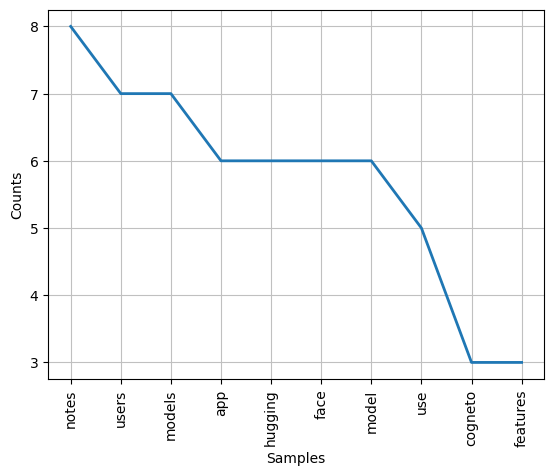

In [ ]:
# Frequency distribution after removing stopwords
fdist_cleaned = FreqDist(words_clean)
fdist_cleaned.most_common(10)
fdist_cleaned.plot(10)

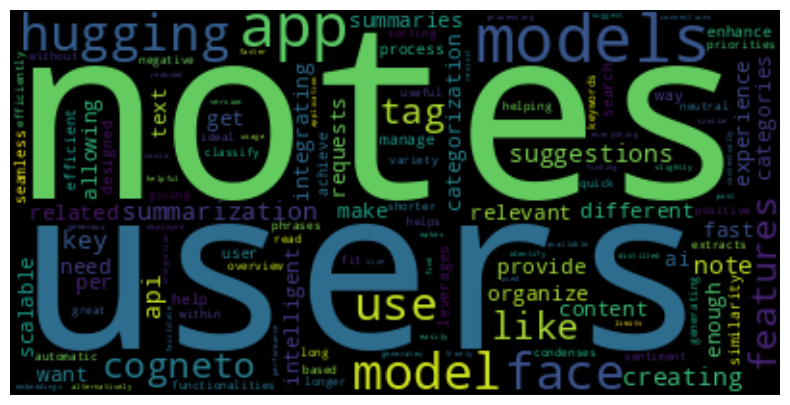

In [ ]:
# Generate word cloud
wordcloud = WordCloud().generate_from_frequencies(fdist_cleaned)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Get sentiment score
sentiment_score = analyzer.polarity_scores(text)

# Print sentiment score
print("Sentiment Score:", sentiment_score)

# Categorize sentiment based on compound score
if sentiment_score['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_score['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print("Overall Sentiment:", sentiment)


Sentiment Score: {'neg': 0.012, 'neu': 0.841, 'pos': 0.147, 'compound': 0.9928}
Overall Sentiment: Positive


In [ ]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Initialize lists to store categorized sentences
positive_sentences = []
neutral_sentences = []
negative_sentences = []

# Loop through each sentence
for sentence in sentences:
    sentiment_score = analyzer.polarity_scores(sentence)

    # Print detailed sentiment score for each sentence
    print(f"Sentiment scores for sentence: {sentence}")
    print(f"Sentiment: {sentiment_score}")

    # Categorize based on compound score
    if sentiment_score['compound'] >= 0.05:
        positive_sentences.append(sentence)
    elif sentiment_score['compound'] <= -0.05:
        negative_sentences.append(sentence)
    else:
        neutral_sentences.append(sentence)


Sentiment scores for sentence: 
Cogneto is a note-taking app that leverages AI to enhance user experience through real-time features like sentiment-based categorization, tag suggestions, summarization, and similarity search.
Sentiment: {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.3612}
Sentiment scores for sentence: These features are designed to help users manage and organize their notes in a more intelligent way, creating a seamless and efficient note-taking process.
Sentiment: {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.8822}
Sentiment scores for sentence: To achieve these functionalities, you can make use of a variety of models from Hugging Face.
Sentiment: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215}
Sentiment scores for sentence: For sentiment-based categorization, you can use a model like **distilbert-base-uncased-finetuned-sst-2-english**, which helps to classify notes into different sentiment categories such as positive, negative, or neutral.

In [ ]:
# Display categorized sentences

print("\nPositive Sentences:")
if positive_sentences:
    for sentence in positive_sentences:
        print(f"- {sentence}")
else:
    print("No positive sentences found.")

print("\nNeutral Sentences:")
if neutral_sentences:
    for sentence in neutral_sentences:
        print(f"- {sentence}")
else:
    print("No neutral sentences found.")

print("\nNegative Sentences:")
if negative_sentences:
    for sentence in negative_sentences:
        print(f"- {sentence}")
else:
    print("No negative sentences found.")



Positive Sentences:
- 
Cogneto is a note-taking app that leverages AI to enhance user experience through real-time features like sentiment-based categorization, tag suggestions, summarization, and similarity search.
- These features are designed to help users manage and organize their notes in a more intelligent way, creating a seamless and efficient note-taking process.
- To achieve these functionalities, you can make use of a variety of models from Hugging Face.
- For sentiment-based categorization, you can use a model like **distilbert-base-uncased-finetuned-sst-2-english**, which helps to classify notes into different sentiment categories such as positive, negative, or neutral.
- This can be useful for sorting notes into different priorities or categories within the app.
- For generating automatic tag suggestions based on the content of a note, the **ml6team/keyphrase-extraction-kbir-inspec** model is a great fit.
- It extracts key phrases or keywords from the note and can provide

In [ ]:
# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the text using spaCy
doc = nlp(text)

# Extract named entities
entities = [(entity.text, entity.label_) for entity in doc.ents]
print(entities)

[('AI', 'GPE'), ('Hugging Face', 'ORG'), ('Hugging Face', 'ORG'), ('Cogneto', 'ORG'), ('Hugging Face', 'ORG'), ('API', 'ORG'), ('Hugging Face', 'ORG'), ('API', 'ORG'), ('API', 'ORG'), ('30,000', 'CARDINAL'), ('Cogneto', 'ORG'), ('AI', 'ORG')]


In [ ]:
# Example labeled dataset
texts = ['work meeting notes', 'study session for exam', 'personal diary entry']
labels = ['work', 'study', 'personal']

# Vectorize the texts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train a classifier
clf = MultinomialNB()
clf.fit(X, labels)

# Predict tags for new notes
new_notes = ['team collaboration update', 'preparing for finals']
X_new = vectorizer.transform(new_notes)
predicted_tags = clf.predict(X_new)
print(predicted_tags)


['personal' 'study']


In [ ]:
# Apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10)  # Limit to 10 important words
X_tfidf = vectorizer.fit_transform(texts)

# Get the top keywords
keywords = vectorizer.get_feature_names_out()
print(keywords)

['diary' 'entry' 'exam' 'for' 'meeting' 'notes' 'personal' 'session'
 'study' 'work']


In [ ]:
# Example texts for TF-IDF
texts = ['Cogneto is a note-taking app that leverages AI', 'Hugging Face provides pre-trained models']

# Apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5)  # Limit to 5 important words
X_tfidf = vectorizer.fit_transform(texts)

# Get the top keywords
keywords = vectorizer.get_feature_names_out()
print(keywords)


['ai' 'app' 'cogneto' 'face' 'hugging']


In [ ]:
# Example note texts
texts = ['Meeting with Aasha', 'Project update for the team', 'Grocery shopping list', 'Discuss project scope']

# Convert texts to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Display clusters
for i, label in enumerate(kmeans.labels_):
    print(f"Note: {texts[i]} - Cluster: {label}")


Note: Meeting with Aasha - Cluster: 0
Note: Project update for the team - Cluster: 0
Note: Grocery shopping list - Cluster: 0
Note: Discuss project scope - Cluster: 1


In [ ]:
# Load pre-trained model for sentence embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example notes
notes = ['Meeting with Aasha', 'Project update for the team', 'Grocery shopping list']
query = 'Discuss project scope'

# Encode the notes and query to embeddings
embeddings = model.encode(notes, convert_to_tensor=True)
query_embedding = model.encode(query, convert_to_tensor=True)

# Calculate cosine similarities
cosine_scores = util.pytorch_cos_sim(query_embedding, embeddings)
print(cosine_scores)


tensor([[0.1623, 0.4826, 0.0484]])


In [ ]:
# Load summarization model from Hugging Face
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Generate summary
summary = summarizer(text, max_length=100, min_length=50, do_sample=False)
print(summary)


Device set to use cpu
Your max_length is set to 100, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[{'summary_text': 'Cogneto is a note-taking app that lets users take notes on the go. The app is available for iOS and Android devices. Cogneto is also available for Mac and Windows PCs. For more information on Cogneto, visit Cogneto.com.'}]


In [ ]:
# Load Marian model for translation (English to Spanish)
model_name = 'Helsinki-NLP/opus-mt-en-es'
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# Translate text
text = "Cogneto is a note-taking app"
translated = tokenizer.encode(text, return_tensors="pt")
translation = model.generate(translated)
translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)

print(translated_text)


Cogneto es una aplicación para tomar notas


In [ ]:
# Load the pre-trained NER pipeline
ner_tagger = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# Example text for NER
example = '''Albert Einstein was born in Ulm, Germany, in 1879. He is widely recognized as one of the most influential scientists of the 20th century.'''

# Get the named entities
entities = ner_tagger(example)
print(entities)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'entity': 'I-PER', 'score': np.float32(0.9990545), 'index': 1, 'word': 'Albert', 'start': 0, 'end': 6}, {'entity': 'I-PER', 'score': np.float32(0.99947876), 'index': 2, 'word': 'Einstein', 'start': 7, 'end': 15}, {'entity': 'I-LOC', 'score': np.float32(0.99719065), 'index': 6, 'word': 'U', 'start': 28, 'end': 29}, {'entity': 'I-LOC', 'score': np.float32(0.9954562), 'index': 7, 'word': '##lm', 'start': 29, 'end': 31}, {'entity': 'I-LOC', 'score': np.float32(0.9995571), 'index': 9, 'word': 'Germany', 'start': 33, 'end': 40}]


In [ ]:
# Load the pre-trained text classification pipeline
classifier = pipeline("zero-shot-classification")

# Define candidate labels
labels = ["Technology", "Education", "Business", "Personal"]

# Perform zero-shot classification
classification = classifier(text, candidate_labels=labels)
print(classification)


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'sequence': '\nCogneto is a note-taking app that leverages AI to enhance user experience through real-time features like sentiment-based categorization, tag suggestions, summarization, and similarity search. These features are designed to help users manage and organize their notes in a more intelligent way, creating a seamless and efficient note-taking process.\n\nTo achieve these functionalities, you can make use of a variety of models from Hugging Face. For sentiment-based categorization, you can use a model like distilbert-base-uncased-finetuned-sst-2-english, which helps to classify notes into different sentiment categories such as positive, negative, or neutral. This can be useful for sorting notes into different priorities or categories within the app.\n\nFor generating automatic tag suggestions based on the content of a note, the ml6team/keyphrase-extraction-kbir-inspec model is a great fit. It extracts key phrases or keywords from the note and can provide relevant tag suggesti

In [ ]:
# Load the pre-trained text generation pipeline
text_generator = pipeline("text-generation", model="gpt2")

# Example prompt for generation
prompt = "How does Cogneto, the revolutionary note-taking app, help users?"

# Generate text
generated_text = text_generator(prompt, max_length=100, num_return_sequences=1)
print(generated_text)


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "How does Cogneto, the revolutionary note-taking app, help users?\n\nAdvertisement\n\nWhile the app is very simple to use, it is highly configurable. Users can choose from various settings (no matter how much they want to use) and can also customize their own settings.\n\nThe app can be downloaded for free on the App Store, Google Play, and Apple's App Store. The app is also available in the Google Play store.\n\nWhat kind of features do you think users will like in Cogneto?\n\nAdvertisement\n\nAs a result, it is possible to understand the user's mood and how they feel. This helps users to better understand their personal needs and interests.\n\nAs a result of these, you can use Cogneto to help you take control of your day, to improve your performance, and to help you stay organized.\n\nIt is a fun way to learn about your own personal and professional life.\n\nWhat are your own favorite apps and tools for using Cogneto?\n\nAdvertisement\n\nWe recommend that everyone

In [ ]:
# Load Marian model for translation (English to Spanish)
model_name = 'Helsinki-NLP/opus-mt-en-es'
translator = pipeline("translation", model=model_name)

# Load pre-trained question-answering pipeline
qa_pipeline = pipeline("question-answering")

question = "What does Cogneto help with?"

# Get the answer from question-answering pipeline
answer = qa_pipeline(question=question, context=text)

# Print the answer in English
print("Answer (English):", answer['answer'])

# Translate the answer into Spanish
translated_answer = translator(answer['answer'])
print("\nTranslated Answer (Spanish):", translated_answer[0]['translation_text'])


Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Answer (English): finding related notes and creating intelligent connections between them

Translated Answer (Spanish): encontrar notas relacionadas y crear conexiones inteligentes entre ellas


In [60]:
# Finalize pipeline - End of execution

def safe_get_variable(var_name, default_value=None):
    """Safely get a variable from globals, return default if not found"""
    return globals().get(var_name, default_value)

try:
    # Safely collect all results with fallbacks
    results = {
        "sentiment_analysis": safe_get_variable('sentiment', 'Not Available'),
        "positive_sentences": safe_get_variable('positive_sentences', []),
        "neutral_sentences": safe_get_variable('neutral_sentences', []),
        "negative_sentences": safe_get_variable('negative_sentences', []),
        "named_entities": safe_get_variable('entities', []),
        "classification": {
            "label": safe_get_variable('classification', {}).get('labels', ['Not Available'])[0] if safe_get_variable('classification') else "Not Available",
            "confidence": safe_get_variable('classification', {}).get('scores', [0.0])[0] if safe_get_variable('classification') else 0.0
        },
        "generated_text": safe_get_variable('generated_text', [{}])[0].get('generated_text', 'Not Available') if safe_get_variable('generated_text') else "Not Available",
        "summarized_text": safe_get_variable('summary', [{}])[0].get('summary_text', 'Not Available') if safe_get_variable('summary') else "Not Available",
        "translated_answer": safe_get_variable('translated_answer', [{}])[0].get('translation_text', 'Not Available') if safe_get_variable('translated_answer') else "Not Available",
        "translated_full_text": safe_get_variable('translated_text', 'Not Available')
    }

    # Save to a JSON file with error handling
    with open('nlp_pipeline_results.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=4, ensure_ascii=False)

    print("\nPipeline completed successfully! Results saved to 'nlp_pipeline_results.json'")

    # Summary of results
    print(f"\nResults Summary:")
    print(f"- Overall Sentiment: {safe_get_variable('sentiment', 'Not Available')}")
    print(f"- Positive Sentences: {len(safe_get_variable('positive_sentences', []))}")
    print(f"- Neutral Sentences: {len(safe_get_variable('neutral_sentences', []))}")
    print(f"- Negative Sentences: {len(safe_get_variable('negative_sentences', []))}")
    print(f"- Named Entities Found: {len(safe_get_variable('entities', []))}")

    classification_result = safe_get_variable('classification')
    if classification_result:
        print(f"- Top Classification: {classification_result['labels'][0]} ({classification_result['scores'][0]:.2f})")
    else:
        print("- Top Classification: Not Available")

except Exception as e:
    print(f"Error occurred while finalizing results: {str(e)}")
    print("Please check that all required variables are defined in your pipeline.")

# Believe in your potential, Invest in your journey, Justify your choices, Align with purpose, and Yield to perseverance.
# End of the script


Pipeline completed successfully! Results saved to 'nlp_pipeline_results.json'

Results Summary:
- Overall Sentiment: Positive
- Positive Sentences: 17
- Neutral Sentences: 2
- Negative Sentences: 0
- Named Entities Found: 12
- Top Classification: Not Available
